In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [47]:
path="/content/drive/MyDrive/datasets/Delinquency_prediction_dataset.csv"
df=pd.read_csv(path)

In [48]:
df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [49]:
df.dtypes

,0
Customer_ID,object
Age,int64
Income,float64
Credit_Score,float64
Credit_Utilization,float64
Missed_Payments,int64
Delinquent_Account,int64
Loan_Balance,float64
Debt_to_Income_Ratio,float64
Employment_Status,object


In [50]:
df.shape

(500, 19)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [52]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

In [53]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


In [54]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


<Axes: >

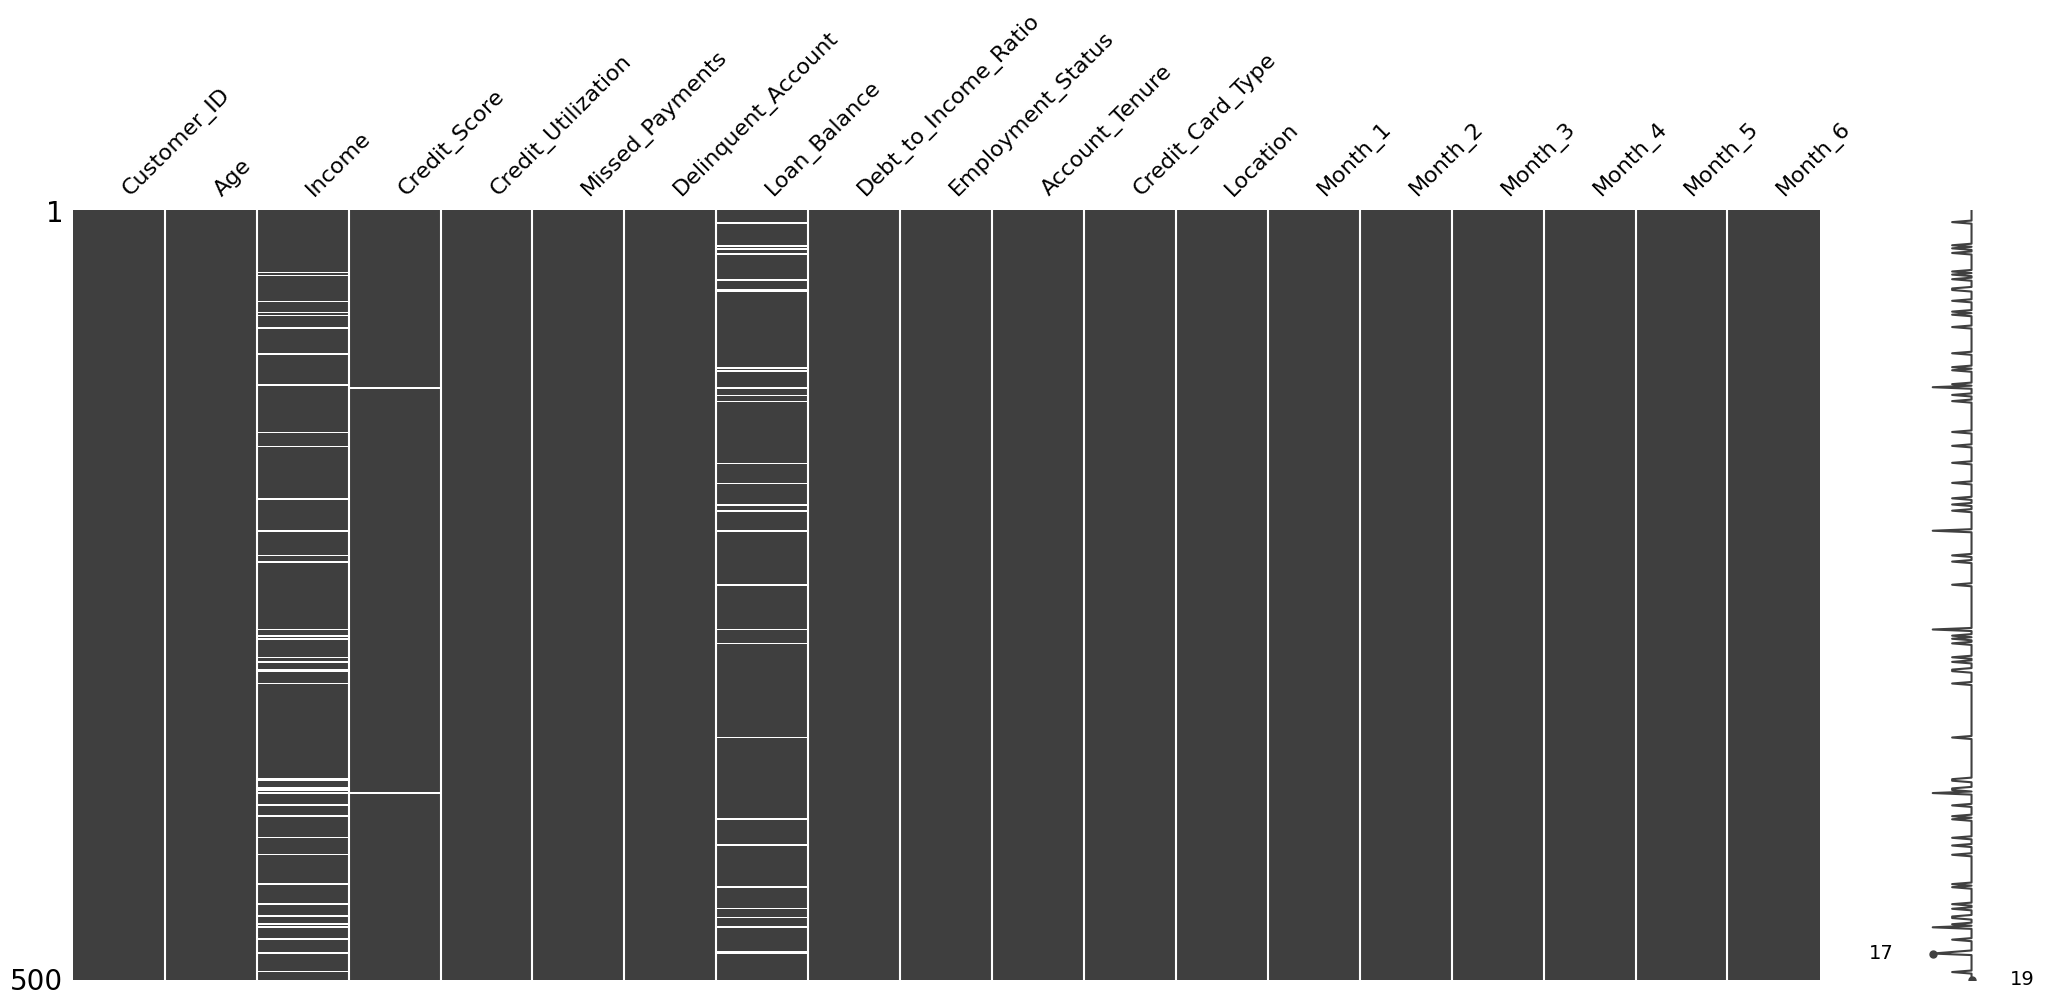

In [55]:
missingno.matrix(df)

In [56]:
cate_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(exclude= 'object')

In [57]:
display(cate_cols.columns)
display(num_cols.columns)

Index(['Customer_ID', 'Employment_Status', 'Credit_Card_Type', 'Location',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6'],
      dtype='object')

Index(['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Account_Tenure'],
      dtype='object')

In [58]:
#give count of unique values of each categorical columns
for col in cate_cols:
  print(df[col].value_counts())

Customer_ID
CUST0500    1
CUST0001    1
CUST0002    1
CUST0003    1
CUST0484    1
           ..
CUST0009    1
CUST0008    1
CUST0007    1
CUST0006    1
CUST0005    1
Name: count, Length: 500, dtype: int64
Employment_Status
Unemployed       93
retired          87
Employed         82
EMP              81
Self-employed    80
employed         77
Name: count, dtype: int64
Credit_Card_Type
Gold        118
Student     112
Business    108
Standard     86
Platinum     76
Name: count, dtype: int64
Location
Los Angeles    107
Phoenix        103
Chicago        103
Houston         95
New York        92
Name: count, dtype: int64
Month_1
On-time    177
Missed     164
Late       159
Name: count, dtype: int64
Month_2
Late       173
Missed     167
On-time    160
Name: count, dtype: int64
Month_3
Late       169
On-time    169
Missed     162
Name: count, dtype: int64
Month_4
Late       181
Missed     160
On-time    159
Name: count, dtype: int64
Month_5
Missed     187
On-time    162
Late       151
Name: cou

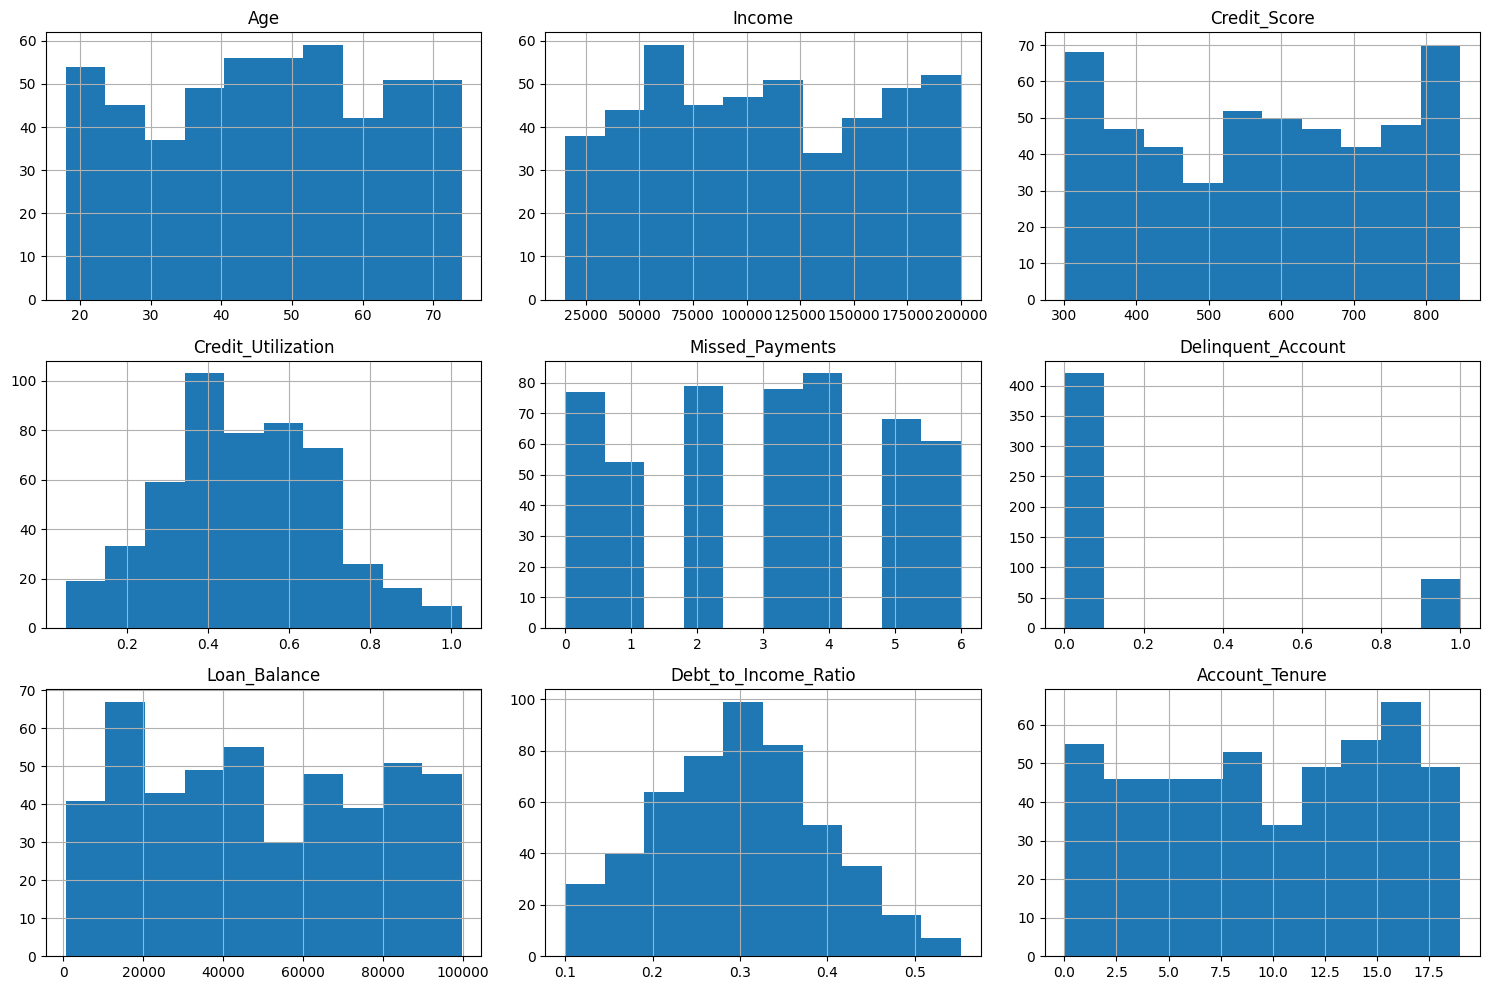

In [59]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

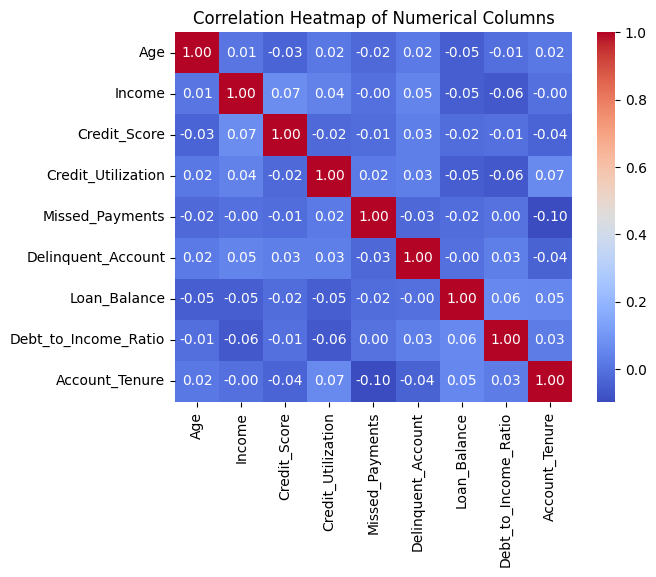

In [60]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

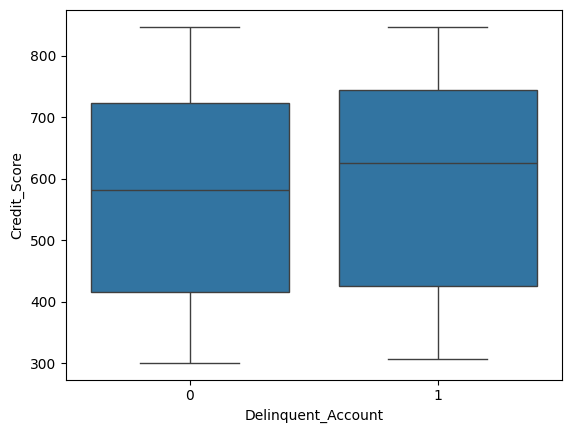

In [61]:
sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df)
plt.show()

<Axes: xlabel='Delinquent_Account', ylabel='count'>

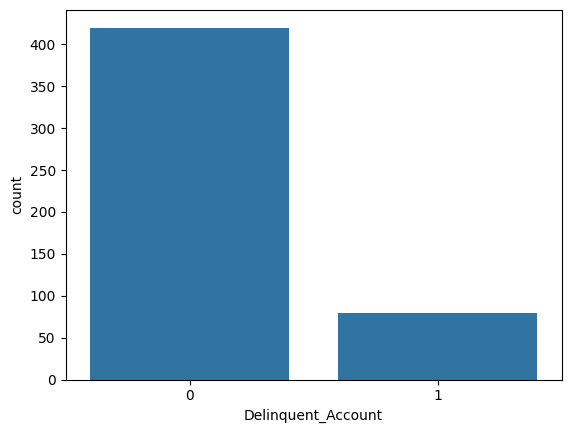

In [62]:
sns.countplot(x='Delinquent_Account',data=df)

In [63]:
df['Credit_Score'].isnull().sum()

np.int64(2)

In [64]:
df['Credit_Score']

,Credit_Score
0,398.0
1,493.0
2,500.0
3,413.0
4,487.0
...,...
495,688.0
496,836.0
497,847.0
498,343.0


In [65]:
df[df['Credit_Score'].isnull()]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
115,CUST0116,18,121884.0,NaN,0.774862,4,0,NaN,0.309286,retired,12,Gold,Los Angeles,On-time,Late,Late,Late,Missed,Late
378,CUST0379,68,NaN,NaN,0.610264,6,0,27490.0,0.324590,EMP,5,Platinum,Phoenix,Missed,Missed,Missed,Late,On-time,Late


In [66]:
# Credit_Score has 2 missing ,simple imputation is best
median_credit_score = df['Credit_Score'].median()

In [67]:
median_credit_score

586.0

In [68]:
df['Credit_Score'].fillna(median_credit_score, inplace=True)

In [69]:
df['Credit_Score'].isnull().sum()

np.int64(0)

In [70]:
# Check missing values BEFORE imputation
print(df['Income'].isnull().sum())

39


In [71]:
#  Generate synthetic income using normal distribution

# Calculate mean & std from existing (non-null) values
income_mean = df['Income'].mean()
income_std = df['Income'].std()

# Number of missing values
missing_count = df['Income'].isnull().sum()

# Create synthetic values from normal distribution
synthetic_income = np.random.normal(loc=income_mean, scale=income_std, size=missing_count)

# Replace missing values with generated values
df.loc[df['Income'].isnull(), 'Income'] = synthetic_income


In [72]:
print(df['Income'].isnull().sum())

0


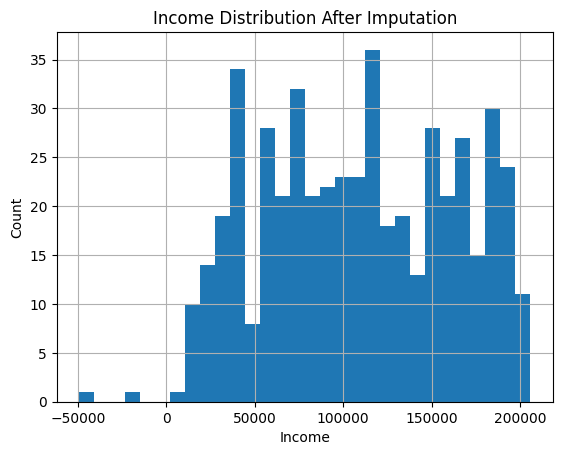

In [73]:
# Plot updated income distribution
df['Income'].hist(bins=30)
plt.title("Income Distribution After Imputation")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [74]:
df['Loan_Balance'].isnull().sum()

np.int64(29)

In [85]:
df['Loan_Balance'] = df['Loan_Balance'].fillna(df['Loan_Balance'].median())

In [76]:
df['Loan_Balance'].isnull().sum()

np.int64(0)

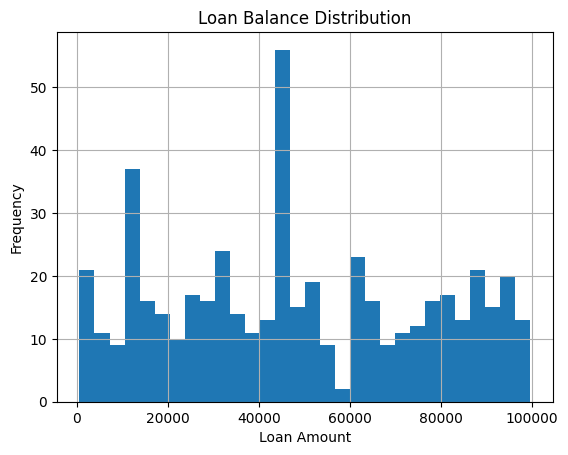

In [77]:
df['Loan_Balance'].hist(bins=30)
plt.title("Loan Balance Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

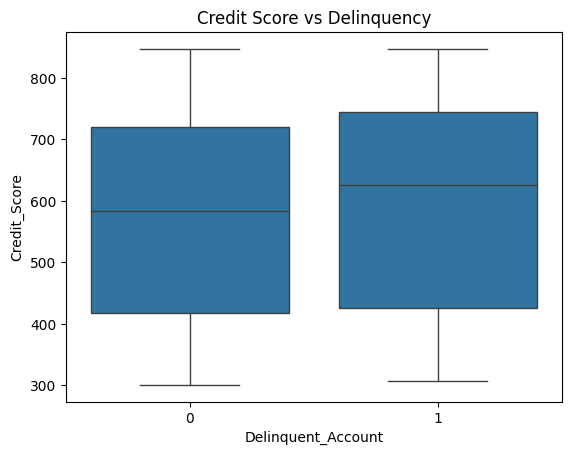

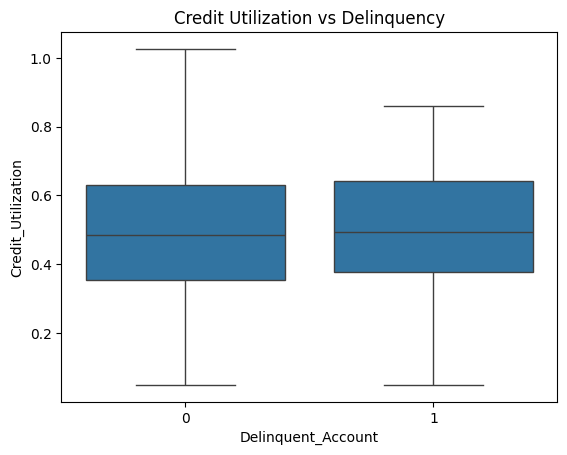

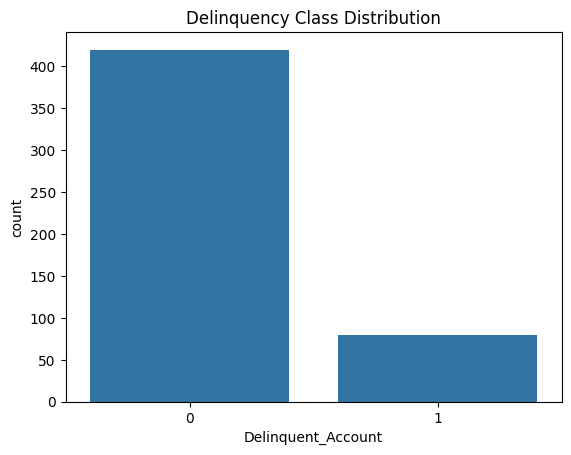

In [78]:
# 🧠 Step 8: Delinquent Account Analysis
sns.boxplot(data=df, x='Delinquent_Account', y='Credit_Score')
plt.title("Credit Score vs Delinquency")
plt.show()

sns.boxplot(data=df, x='Delinquent_Account', y='Credit_Utilization')
plt.title("Credit Utilization vs Delinquency")
plt.show()

sns.countplot(data=df, x='Delinquent_Account')
plt.title("Delinquency Class Distribution")
plt.show()

In [79]:
# Use IQR method for detecting outliers
numerical = ['Age', 'Income', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Credit_Score']
for col in numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col} → {len(outliers)} outliers")

Age → 0 outliers
Income → 0 outliers
Loan_Balance → 0 outliers
Debt_to_Income_Ratio → 0 outliers
Credit_Score → 0 outliers


In [80]:
def detect_risk(row):
    return any([
        row['Credit_Score'] < 500,
        row['Credit_Utilization'] > 0.6,
        row['Debt_to_Income_Ratio'] > 0.4,
        row['Missed_Payments'] > 3,
        row['Month_6'] in ['Missed', 'Late'],
        row['Employment_Status'].strip().lower() == 'unemployed'
    ])

df['Delinquency_Risk'] = df.apply(detect_risk, axis=1)
print("At-risk records:", df['Delinquency_Risk'].sum())

At-risk records: 474


In [81]:
df['Employment_Status'] = df['Employment_Status'].str.strip().str.title()
df['Credit_Card_Type'] = df['Credit_Card_Type'].str.strip().str.title()

In [82]:
# Some customers show "Missed" in monthly data but Missed_Payments = 0
def inconsistency(row):
    months = [row[f'Month_{i}'] for i in range(1, 7)]
    return row['Missed_Payments'] == 0 and any(m == 'Missed' for m in months)

df['Inconsistent'] = df.apply(inconsistency, axis=1)
print("Inconsistent records:", df['Inconsistent'].sum())

Inconsistent records: 68


In [83]:
print(df.describe())
print(df['Delinquency_Risk'].value_counts())

              Age         Income  Credit_Score  Credit_Utilization  \
count  500.000000     500.000000    500.000000          500.000000   
mean    46.266000  109104.130963    577.750000            0.491446   
std     16.187629   53827.743456    168.543244            0.197103   
min     18.000000  -49190.918141    301.000000            0.050000   
25%     33.000000   66740.750000    418.750000            0.356486   
50%     46.500000  108842.000000    586.000000            0.485636   
75%     59.250000  155734.000000    725.750000            0.634440   
max     74.000000  205896.904493    847.000000            1.025843   

       Missed_Payments  Delinquent_Account  Loan_Balance  \
count       500.000000          500.000000    500.000000   
mean          2.968000            0.160000  48487.480000   
std           1.946935            0.366973  28536.522206   
min           0.000000            0.000000    612.000000   
25%           1.000000            0.000000  24847.000000   
50%      